In [1]:
#But first, import necessary modules for the calculations
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
import csv
import matplotlib as mpl

## First need to determine the startpoint for the whole catalog


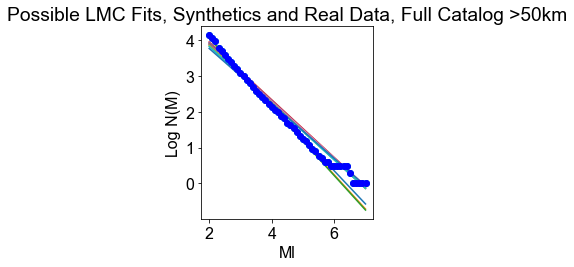

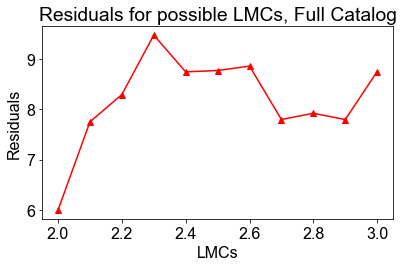

In [2]:
s=2006
d,depth,m,ml,years,amt=[],[],[],[],[],[]
evtfl=open('allrelocevt.lst')
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])
    
years=[float(i) for i in years]
for i in range(len(years)):
    if years[i]<s:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])
            
depth=[float(i) for i in depth]
ml=[float(i) for i in ml]

ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]
amt.append(len(depth))

min_mag=np.arange(2.0,3.1,0.1)

binwidth=0.1
Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
hist,bin_edges=np.histogram(ml,bins=Nbins)
bin_edges=bin_edges[:-1]
cum_y=[sum(hist[i:]) for i in range(len(hist))]
y=np.log10(cum_y)


aval,b,bval=[],[],[]
for j in range(len (min_mag)):
    ycut,bin_edgescut=[],[]
    ml_cut=[]
    for i in range (len(y)):
        if bin_edges[i]>=min_mag[j] and bin_edges[i]<5.0:
            ycut.append(y[i])
            bin_edgescut.append(bin_edges[i])
    for i in range (len(ml)):
        if ml[i]>=min_mag[j]:
            ml_cut.append(ml[i])
    
    mu=sum(ml_cut)/len(ml_cut) 
    m=0.1
    mc=min_mag[j]
    p=1+(m/(mu-mc))
    b_=(1/(math.log(10)*m))*math.log(p)
    bval.append(b_)
        
    a = np.log10(len(ml_cut)) + b_* mc
    aval.append(a)
    
syn_ml=np.arange(2.0, max(ml)+binwidth, binwidth)
syn_ml=syn_ml[1:]
synthetics=[]
for i in range(len(aval)):
    syn_data=bval[i]*-1*syn_ml+aval[i]
    synthetics.append(syn_data)
    
    
B=y
residuals=[]
for i in range(len(synthetics)):
    R=[]
    for j in range(len(synthetics[i])):
        S=synthetics[i]
        r= abs(B[j]-S[j])
        #r= (abs(B[j]-S[j]))**2
        R.append(r)
    resid=((sum(R)/sum(B))*100)
    #resid=np.sqrt(sum(R)/len(S))
    residuals.append(resid)
    
plt.figure()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size']=16
mpl.rcParams['font.family'] = 'Arial'
plt.plot(bin_edges,y, 'co')
plt.plot(bin_edges, synthetics[0])
plt.plot(bin_edges, synthetics[1])
plt.plot(bin_edges, synthetics[2])
plt.plot(bin_edges, synthetics[3])
plt.plot(bin_edges, synthetics[4])
plt.plot(bin_edges, synthetics[5])
plt.plot(bin_edges, synthetics[6])
plt.plot(bin_edges, synthetics[7])
plt.plot(bin_edges, synthetics[8])
plt.plot(bin_edges, synthetics[9])
plt.plot(bin_edges, synthetics[10])
plt.plot(bin_edges, y,'bo')

plt.title('Possible LMC Fits, Synthetics and Real Data, Full Catalog >50km')
plt.ylabel('Log N(M)')
plt.xlabel('Ml')
plt.tight_layout()
plt.savefig('LMC_synthetics_transect_full50.jpg')
plt.savefig('LMC_synthetics_transect_full50.pdf')


plt.figure()
plt.plot(min_mag, residuals, 'r^')
plt.plot(min_mag, residuals, 'r-')
plt.title('Residuals for possible LMCs, Full Catalog')
plt.xlabel('LMCs')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('LMC_residuals_transect_full50.jpg')
plt.savefig('LMC_residuals_transect_full50.pdf')

for i in range(len(residuals)):
    if residuals[i]<= 5:
        lower_cutoff_magnitude = min_mag[i]
        break
            
    elif residuals[i]== min(residuals):
        lower_cutoff_magnitude = min_mag[i]

## Now Determine the Upper Cutoff Magnitude Using this Lower Cutoff Magnitude


In [3]:
print(lower_cutoff_magnitude)


2.0


[0.6335229231737463, 0.9509529019897375, 1.2366783029584432, 1.5827672443870666, 1.9289149964912857, 2.15087634434312, 2.40273375171051, 2.5471940040384906, 2.775463611576988, 2.886470509489122, 3.153354523738757, 3.2934301203751932, 3.418059195912926, 3.5672468236887704, 3.778002582303735, 3.942281275258476, 4.024237583644263, 4.146550151505387, 4.32143901732796, 4.3984330604250745, 4.554449519885787, 4.670244909132743, 4.799073311032579, 4.785561715499335, 4.8593632543787155, 4.879941396422891, 5.003178676403421, 5.227452933384598, 5.551176003972255, 5.972792836297835, 6.345325088176591, 6.505387483352577, 6.731663138933134, 7.058747076300914, 7.486639295455921, 8.015339796398154]


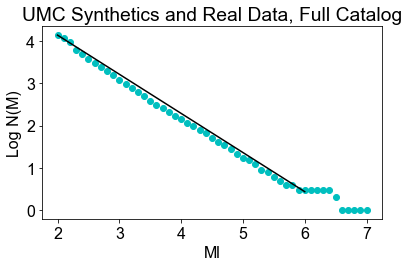

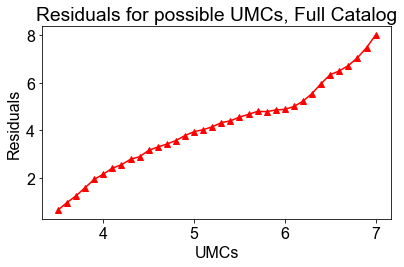

In [4]:
mc=lower_cutoff_magnitude
start=s
#open file and create empty lists for the info that is needed
d,depth,m,ml,years=[],[],[],[],[]
evtfl=open('allrelocevt.lst')

#fill the empty lists with data from the associated file
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])
        
years=[float(i) for i in years]

for i in range(len(years)):
    if years[i]<start:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])
depth=[float(i) for i in depth]
ml=[float(i) for i in ml] 

max_mag=np.arange(3.5,7.1,0.1)

ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

amt.append(len(depth))

binwidth=0.1
Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
hist,bin_edges=np.histogram(ml,bins=Nbins)

bin_edges=bin_edges[:-1]

cum_y=[sum(hist[i:]) for i in range(len(hist))]
y=np.log10(cum_y)

aval,b,bval,synthetics, real, bins_=[],[],[],[],[],[]
syn_ml=np.arange(mc,3.5,0.1)
cutoffs=[]
residuals=[]
r_bins=[]
for j in range(len (max_mag)):
    ml_cut=[]

    for i in range (len(ml)):
        if ml[i]<=max_mag[j] and ml[i]>=mc:
            ml_cut.append(ml[i])

    ################################################################################
    ######################## MAXIMUM LIKELIHOOD ####################################
    ################################################################################
    # ycut= y values for log10(cum_y)
    # bin_edgescut= bin values

    mu=sum(ml_cut)/len(ml_cut) #mu
    m=0.1

    p=1+(m/(mu-mc)) #eqn 3.10
    b=(1/(math.log(10)*m))*math.log(p)
    bval.append(b)

    a = np.log10(len(ml_cut)) + b* mc
    aval.append(a)


    ### Only using the following linear regression to generate a values for the synthetic data until I can
    ### figure out how to use maximum likelihood to calculate them

    #slope, intercept, r_value, p_value, std_err= stats.linregress(bin_edgescut,ycut)        
    #a.append(intercept)
    #b.append(slope)

#We now have a list of a and b values. One set of a and b for each minimum magnitude possibility.
#Now, we need to generate synthetic data for each a,b set 

    syn_ml=np.ndarray.tolist(syn_ml)

    if max_mag[j] > max(bin_edges):
        break

    syn_ml.append(max_mag[j])


    #syn_ml=syn_ml[1:]
    syn_ml=np.asarray(syn_ml)

    syn_data=b*-1*syn_ml+a
    synthetics.append(syn_data)


#this chunk of code creates one list called synthetics which is filled with lists of synthetic data for each 
#set of a,b 

#NEXT we need to compare this synthetic data with the real data,
# need to calculte the number of events in each magnitude bin for both sets of data and compare them
#     B=y

    #truncate bin_edges and y to match the data cut off by the rest
    B,bins=[],[]

    for i in range(len(bin_edges)):

        if bin_edges[i] >= mc and bin_edges[i] <= max_mag[j]+0.01:
                B.append(y[i])
                bins.append(round(bin_edges[i],1))

    bins_.append(bins)
    real.append(B)
    R=[]  


    r= abs(B-syn_data)
    #r=(abs(B-syn_data))**2
    #print(r)
    #R.append(r)
    resid=((sum(r)/sum(B))*100)
    #resid=np.sqrt(sum(r)/len(syn_data))
    residuals.append(resid)

residuals_bins=np.arange(3.5,max(bin_edges),0.1)

print(residuals)
for i in range(len(residuals)):
        
    if residuals[i]>= 5:
        upper_cutoff_magnitude=max_mag[i-1]
        plt.figure()
        plt.plot(bin_edges, y,'co')
        plt.plot(bins_[i-1],synthetics[i-1],'k-')
        plt.title('UMC Synthetics and Real Data, Full Catalog')
        plt.ylabel('Log N(M)')
        plt.xlabel('Ml')
        plt.tight_layout()
        plt.savefig('UMC_synthetics_full50.jpg')
        plt.savefig('UMC_synthetics_full50.pdf')
        plt.figure()
        plt.plot(residuals_bins, residuals,'r')
        plt.plot(residuals_bins, residuals,'r^')
        plt.title('Residuals for possible UMCs, Full Catalog')
        plt.xlabel('UMCs')
        plt.ylabel('Residuals')
        plt.tight_layout()
        plt.savefig('UMC_residuals_full50.jpg')
        plt.savefig('UMC_residuals_full50.pdf')
        break
            



In [5]:
print(upper_cutoff_magnitude)

6.000000000000002


## Now Redefine the Lower Cutoff Magnitude 

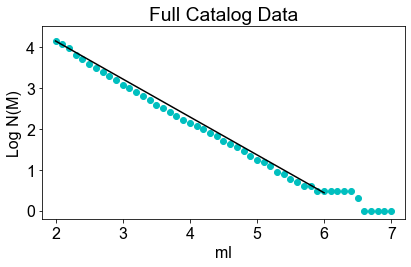

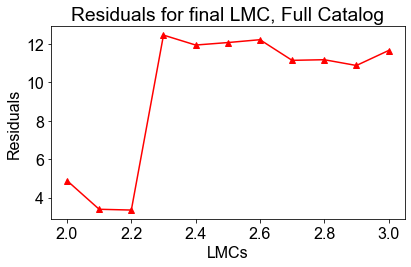

In [6]:
UMC=round(upper_cutoff_magnitude,1)
start=s


    
d,depth,m,ml,years=[],[],[],[],[]
evtfl=open('allrelocevt.lst')

#fill the empty lists with data from the associated file
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])

years=[float(i) for i in years]

#keep only the data that is from after the start point given in the list above
for i in range(len(years)):
    if years[i]<start:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])

#change data type from strings to floating point numbers
depth=[float(i) for i in depth]
ml=[float(i) for i in ml]

ml=[ml[i] for i in range(len(depth)) if depth[i] >= 50 ]
depth=[depth[i] for i in range(len(depth)) if depth[i] >= 50 ]

amt.append(len(depth))

####################

min_mag=np.arange(2.0,3.1,0.1)
#min_mag=np.ndarray.tolist(min_mag)

binwidth=0.1
Nbins=np.arange(2.0,max(ml)+binwidth,binwidth)
hist,bin_edges=np.histogram(ml,bins=Nbins)

bin_edges=bin_edges[:-1]

cum_y=[sum(hist[i:]) for i in range(len(hist))]
y=np.log10(cum_y)

#################### HERE COMES THE GOOD STUFF

aval,b,bval,synthetics,real,bins_ = [],[],[],[],[],[]

cutoffs=[]
residuals=[]
r_bins=[]

for j in range(len(min_mag)):
    ml_cut=[]
    syn_ml=np.arange(min_mag[j],UMC+binwidth,0.1) 

    for i in range(len(ml)):
        if ml[i]>= min_mag[j] and ml[i]<=UMC:
            ml_cut.append(ml[i])

    mu= sum(ml_cut)/len(ml_cut) #sample average
    delta_m=0.1                 #magnitude interval

    p=1+(delta_m/(mu-min_mag[j]))
    b=(1/(math.log(10)*delta_m))*math.log(p)

    bval.append(b)

    a= np.log10(len(ml_cut))+b*min_mag[j]
    aval.append(a)


    #now deal with the synthetic data

    syn_data=b*-1*syn_ml+a
    synthetics.append(syn_data)

    B,bins=[],[]
    for i in range(len(bin_edges)):
        if bin_edges[i] >= min_mag[j] and bin_edges[i]<= UMC+0.1:
            B.append(y[i])
            bins.append(round(bin_edges[i],1))

    bins_.append(bins)
    real.append(B)

    R=[]
    r= abs(B-syn_data)
    #r=(abs(B-syn_data))**2
    
    R.append(r)
    resid=((sum(r)/sum(B))*100)
    #resid=np.sqrt(sum(r)/len(syn_data))
    residuals.append(resid)



residuals_bins=np.arange(2.0,3.1,0.1)

for i in range (len(residuals)):
    if residuals [i] <= 5:
        final_lower_cutoff_magnitude=min_mag[i]      
        plt.figure()
        plt.plot(bin_edges,y,color='c',marker='o',linestyle='None')
        plt.plot(bins_[i],synthetics[i],'k')
        plt.title('Full Catalog Data')
        plt.xlabel('ml')
        plt.ylabel('Log N(M)')
        plt.ylim(-0.2,4.5)
        plt.xlim(1.8,7.2)
        plt.tight_layout()
        plt.savefig('final_LMC_synthetics_full50.jpg')
        plt.savefig('final_LMC_synthetics_full50.pdf')
        
        
        plt.figure()
        plt.plot(residuals_bins,residuals,'r^')
        plt.plot(residuals_bins,residuals, 'r-')
        plt.title('Residuals for final LMC, Full Catalog')
        plt.xlabel('LMCs')
        plt.ylabel('Residuals')
        plt.tight_layout()
        plt.savefig('final_LMC_residuals_full50.jpg')
        plt.savefig('final_LMC_residuals_full50.pdf')
        break
        

## NOW Calculate the b-Value for the Full Catalog

In [7]:
print(final_lower_cutoff_magnitude)
print(upper_cutoff_magnitude)

2.0
6.000000000000002


[0.6335229231737463, 0.9509529019897375, 1.2366783029584432, 1.5827672443870666, 1.9289149964912857, 2.15087634434312, 2.40273375171051, 2.5471940040384906, 2.775463611576988, 2.886470509489122, 3.153354523738757, 3.2934301203751932, 3.418059195912926, 3.5672468236887704, 3.778002582303735, 3.942281275258476, 4.024237583644263, 4.146550151505387, 4.32143901732796, 4.3984330604250745, 4.554449519885787, 4.670244909132743, 4.799073311032579, 4.785561715499335, 4.8593632543787155, 4.879941396422891, 5.003178676403421, 5.227452933384598, 5.551176003972255, 5.972792836297835, 6.345325088176591, 6.505387483352577, 6.731663138933134, 7.058747076300914, 7.486639295455921, 8.015339796398154]


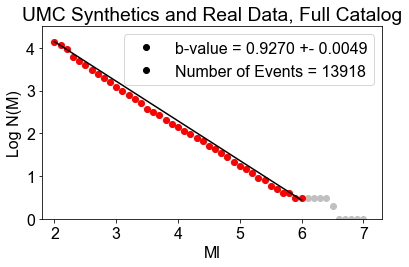

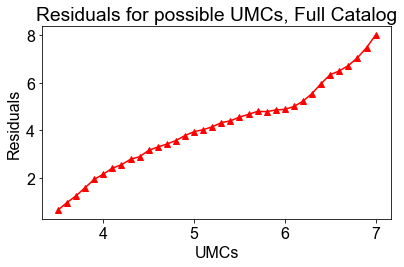

In [8]:
mc=2.0
start=s
#open file and create empty lists for the info that is needed
d,depth,m,ml,years=[],[],[],[],[]
evtfl=open('allrelocevt.lst')

#fill the empty lists with data from the associated file
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])
        
years=[float(i) for i in years]

for i in range(len(years)):
    if years[i]<start:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])
depth=[float(i) for i in depth]
ml=[float(i) for i in ml] 

max_mag=np.arange(3.5,7.1,0.1)

ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

amt.append(len(depth))

binwidth=0.1
Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
hist,bin_edges=np.histogram(ml,bins=Nbins)

bin_edges=bin_edges[:-1]

cum_y=[sum(hist[i:]) for i in range(len(hist))]
y=np.log10(cum_y)

aval,b,bval,synthetics, real, bins_=[],[],[],[],[],[]
syn_ml=np.arange(mc,3.5,0.1)
cutoffs=[]
residuals=[]
r_bins=[]
for j in range(len (max_mag)):
    ml_cut=[]

    for i in range (len(ml)):
        if ml[i]<=max_mag[j] and ml[i]>=mc:
            ml_cut.append(ml[i])

    ################################################################################
    ######################## MAXIMUM LIKELIHOOD ####################################
    ################################################################################
    # ycut= y values for log10(cum_y)
    # bin_edgescut= bin values

    mu=sum(ml_cut)/len(ml_cut) #mu
    m=0.1

    p=1+(m/(mu-mc)) #eqn 3.10
    b=(1/(math.log(10)*m))*math.log(p)
    bval.append(b)

    a = np.log10(len(ml_cut)) + b* mc
    aval.append(a)


    ### Only using the following linear regression to generate a values for the synthetic data until I can
    ### figure out how to use maximum likelihood to calculate them

    #slope, intercept, r_value, p_value, std_err= stats.linregress(bin_edgescut,ycut)        
    #a.append(intercept)
    #b.append(slope)

#We now have a list of a and b values. One set of a and b for each minimum magnitude possibility.
#Now, we need to generate synthetic data for each a,b set 

    syn_ml=np.ndarray.tolist(syn_ml)

    if max_mag[j] > max(bin_edges):
        break

    syn_ml.append(max_mag[j])


    #syn_ml=syn_ml[1:]
    syn_ml=np.asarray(syn_ml)

    syn_data=b*-1*syn_ml+a
    synthetics.append(syn_data)


#this chunk of code creates one list called synthetics which is filled with lists of synthetic data for each 
#set of a,b 

#NEXT we need to compare this synthetic data with the real data,
# need to calculte the number of events in each magnitude bin for both sets of data and compare them
#     B=y

    #truncate bin_edges and y to match the data cut off by the rest
    B,bins=[],[]

    for i in range(len(bin_edges)):

        if bin_edges[i] >= mc and bin_edges[i] <= max_mag[j]+0.01:
                B.append(y[i])
                bins.append(round(bin_edges[i],1))

    bins_.append(bins)
    real.append(B)
    R=[]  


    r= abs(B-syn_data)
    #r=(abs(B-syn_data))**2
    #print(r)
    #R.append(r)
    resid=((sum(r)/sum(B))*100)
    #resid=np.sqrt(sum(r)/len(syn_data))
    residuals.append(resid)

residuals_bins=np.arange(3.5,max(bin_edges),0.1)

print(residuals)
for i in range(len(residuals)):
        
    if residuals[i]>= 5:
        final_upper_cutoff_magnitude=max_mag[i-1]
        plt.figure()
        
        plt.plot(bin_edges,y,color='silver',marker='o',linestyle='None')
        plt.plot([100],[100],'ko',label='b-value = 0.9270 +- 0.0049')
        plt.plot([99],[99],'ko',label='Number of Events = 13918')
        plt.plot(bin_edges[0:41],y[0:41],'ro')
        plt.legend(loc='best')
        
        
        plt.plot(bins_[i-1],synthetics[i-1],'k-')
        plt.title('UMC Synthetics and Real Data, Full Catalog')
        plt.ylabel('Log N(M)')
        plt.xlabel('Ml')
        plt.xlim(1.8,7.3)
        plt.ylim(0,4.5)
        plt.tight_layout()
        plt.savefig('final_UMC_synthetics_full50.jpg')
        plt.savefig('final_UMC_synthetics_full50.pdf')
        
        plt.figure()
        plt.plot(residuals_bins, residuals,'r')
        plt.plot(residuals_bins, residuals,'r^')
        plt.title('Residuals for possible UMCs, Full Catalog')
        plt.xlabel('UMCs')
        plt.ylabel('Residuals')
        plt.tight_layout()
        plt.savefig('final_UMC_residuals_full50.jpg')
        plt.savefig('final_UMC_residuals_full50.pdf')
        break
            



In [9]:
print(upper_cutoff_magnitude)
print(final_upper_cutoff_magnitude)

6.000000000000002
6.000000000000002


In [10]:
aval,b,bval,error=[],[],[],[]
mc=round(final_lower_cutoff_magnitude,1)
m_max=round(final_upper_cutoff_magnitude,1)
start=s
#open file and create empty lists for the info that is needed
d,depth,m,ml,years=[],[],[],[],[]
evtfl=open('allrelocevt.lst')

#fill the empty lists with data from the associated file
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])

years=[float(i) for i in years]

#keep only the data that is from after the start point given in the list above
for i in range(len(years)):
    if years[i]<start:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])

#change data type from strings to floating point numbers
depth=[float(i) for i in depth]
ml=[float(i) for i in ml]

#set up a list of values for possible minimum magnitudes
#we will carry out linear regression on each of these in order to get estimates for what should be the 
#actual magnitude of completeness
max_mag=np.arange(3.5,6.6,0.1)
#keep only the data that is deeper than 50 km
ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

amt.append(len(depth))

#set up bins for histogram sorting *note that Weimer and Wyss use cumulative magnitude for their methods
binwidth=0.1
Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
#create histogram from real data
hist,bin_edges=np.histogram(ml,bins=Nbins)
bin_edges=bin_edges[:-1]
#make into a cumulative histogram
cum_y=[sum(hist[i:]) for i in range(len(hist))]
#take the log10 of this distribution
y=np.log10(cum_y)

#now here comes the tricky part, we need to trucate for each minimum magnitude but leaving the high magnitude
# in tact and then calculate the linear regression coefficients and store them

ml_cut=[]
for j in range (len(ml)):
    if ml[j]>=mc and ml[j]<= m_max:
        ml_cut.append(ml[j])

    ################################################################################
    ######################## MAXIMUM LIKELIHOOD ####################################
    ################################################################################
    # ycut= y values for log10(cum_y)
    # bin_edgescut= bin values

average=sum(ml_cut)/len(ml_cut) 
m=0.1

p=1+(m/(average-mc))
b_=(1/(math.log(10)*m))*math.log(p)
bval.append(b_)

a = np.log10(len(ml_cut)) + b_* mc
aval.append(a)


print(amt)



[13918, 13918, 13918, 13918, 13918]


## Final Step: Bootstrapping

In [11]:
error=[]
amt=[]
low_mag=lower_cutoff_magnitude
high_mag=upper_cutoff_magnitude
start=s
#open file and create empty lists for the info that is needed
d,depth,m,ml,years=[],[],[],[],[]
evtfl=open('allrelocevt.lst')

#fill the empty lists with data from the associated file
for line in evtfl:
    d.append(line.split()[3])
    m.append(line.split()[16])
    years.append(line.split()[10])

years=[float(i) for i in years]

#keep only the data that is from after the start point given in the list above
for i in range(len(years)):
    if years[i]<start:
        continue
    else:
        depth.append(d[i])
        ml.append(m[i])

#change data type from strings to floating point numbers
depth=[float(i) for i in depth]
ml=[float(i) for i in ml]


#keep only the data that is deeper than 50 km
ml=[ml[i] for i in range(len(depth)) if depth[i]>=50]
depth=[depth[i] for i in range(len(depth)) if depth[i]>=50]

depth=[depth[i] for i in range(len(depth)) if ml[i]>=low_mag and ml[i]<= high_mag]
ml=[ml[i] for i in range(len(ml)) if ml[i]>= low_mag and ml[i] <= high_mag]



amt.append(len(depth))

n=0
nmax=1000
boot_b=[]
while n<nmax:
    index=random.sample(range(len(depth)),round(0.9*len(depth)))

    #use these index numbers to make a list of new magnitude data
    boot_ml=[]
    for i in range(len(index)):
        x=index[i]
        boot_ml.append(ml[x-1])

    binwidth=0.1
    Nbins=np.arange(2.0, max(ml)+binwidth, binwidth)
    #create histogram from real data
    hist,bin_edges=np.histogram(ml,bins=Nbins)
    bin_edges=bin_edges[1:]
    #make into a cumulative histogram
    cum_y=[sum(hist[i:]) for i in range(len(hist))]
    #take the log10 of this distribution
    y=np.log10(cum_y)

    #now here comes the tricky part, we need to trucate for each minimum magnitude but leaving the high magnitude
    # in tact and then calculate the linear regression coefficients and store them

    boot_ml_cut=[]
    for j in range (len(boot_ml)):
        if boot_ml[j]>=low_mag and boot_ml[j]<= high_mag:
            boot_ml_cut.append(boot_ml[j])

        ################################################################################
        ######################## MAXIMUM LIKELIHOOD ####################################
        ################################################################################
        # ycut= y values for log10(cum_y)
        # bin_edgescut= bin values

    average=sum(boot_ml_cut)/len(boot_ml_cut) 
    m=0.1

    p=1+(m/(average-low_mag))
    b_=(1/(math.log(10)*m))*math.log(p)

    a = np.log10(len(boot_ml_cut)) + b_* low_mag

    boot_b.append(b_)

    n+=1

bootstrapped_b=np.mean(boot_b)
bootstrapped_std=np.std(boot_b)

error.append(bootstrapped_std*2)




In [14]:
with open('b_vals_full50to100km.txt','w') as f:
    writer=csv.writer(f,delimiter='\t')
    writer.writerows(zip( bval, error))
    
